# Support Vector Regression (SVR Model)

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) used for regression problems. SVR aims to find a function that approximates the relationship between the independent variables and the dependent variable by minimizing the prediction error, while also ensuring that the model is as simple as possible.

### Key Concepts

#### 1. Objective
SVR seeks to fit a function $ f(x) $ that has at most $ \epsilon $ deviation from the actual target values for all the training data, while also trying to be as flat as possible.

#### 2. Linear SVR
For simplicity, let's start with the linear case. In linear SVR, the model predicts the output using a linear function:

$f(x) = \mathbf{w} \cdot \mathbf{x} + b$

where:
- $ \mathbf{w} $ is a weight vector.
- $ \mathbf{x} $ is the feature vector.
- $ b$ is a bias term.

#### 3. Loss Function
SVR uses the epsilon-insensitive loss function, which ignores errors within a certain threshold $ \epsilon $:

$ L(y, f(x)) = \max(0, |y - f(x)| - \epsilon) $

This means no penalty is given for errors smaller than $ \epsilon $. For errors greater than $ \epsilon $, the loss increases linearly.

#### 4. Optimization Problem
The goal is to minimize the complexity of the model, measured by $ \|\mathbf{w}\|^2 $, while keeping prediction errors within the $ \epsilon $-insensitive tube:

$ \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 $

Subject to:
$ y_i - (\mathbf{w} \cdot \mathbf{x}_i + b) \leq \epsilon $
$ (\mathbf{w} \cdot \mathbf{x}_i + b) - y_i \leq \epsilon $

To handle data points outside the $\epsilon $-tube, slack variables $ \xi_i $ and $ \xi_i^* $ are introduced:

$ y_i - (\mathbf{w} \cdot \mathbf{x}_i + b) \leq \epsilon + \xi_i $
$(\mathbf{w} \cdot \mathbf{x}_i + b) - y_i \leq \epsilon + \xi_i^* $

with $ \xi_i, \xi_i^* \geq 0 $.

The final optimization problem becomes:

$ \min_{\mathbf{w}, b, \xi, \xi^*} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) $

where $C $ is a regularization parameter that controls the trade-off between the flatness of the model and the amount up to which deviations larger than $ \epsilon $ are tolerated.

#### 5. Non-Linear SVR
For non-linear relationships, the input data can be transformed into a higher-dimensional space using a kernel function $ K(\mathbf{x}_i, \mathbf{x}_j) $. Common kernels include:

- **Linear Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j $
- **Polynomial Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d $
- **Radial Basis Function (RBF) Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2) $

By applying a kernel function, SVR can efficiently handle non-linear regression problems.

### Steps in SVR

1. **Data Preparation**:
   - Collect and preprocess the data. Normalize or standardize the features if necessary.

2. **Kernel Selection**:
   - Choose an appropriate kernel function based on the nature of the data and the problem.

3. **Model Training**:
   - Train the SVR model using the training data to find the optimal $ \mathbf{w} $ and \( b $ (and slack variables if necessary).

4. **Model Evaluation**:
   - Evaluate the performance of the model using appropriate regression metrics such as Mean Squared Error (MSE) or R-squared ($ R^2 $).

5. **Prediction**:
   - Use the trained SVR model to make predictions on new data points.

### Advantages and Disadvantages

#### Advantages:
- **Flexibility**: SVR can model both linear and non-linear relationships through the use of kernel functions.
- **Robustness**: The $ \epsilon $-insensitive loss function makes SVR less sensitive to outliers.
- **Generalization**: The regularization parameter $ C $ helps in controlling overfitting.

#### Disadvantages:
- **Computationally Intensive**: Training an SVR, especially with non-linear kernels, can be computationally expensive.
- **Parameter Tuning**: The performance of SVR heavily depends on the choice of parameters (kernel type, $ C $, $\epsilon $), which may require extensive cross-validation.

# Example

Predicting Salary based on the Position.

This is the same problem we solved using Polynomial Regression.d

In [28]:
# import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Import the Data

data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values

In [30]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [32]:
# Convert y data into 2-D array from current 1-D array
# feature scaling requies 2-D array
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [34]:
print (y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [35]:
# Let's train the SVR model on the whole data

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [36]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

The Polynomial Regression had predicted as:

array([158862.45265155])

## Visualizing the SVR results

Text(0, 0.5, 'Salary')

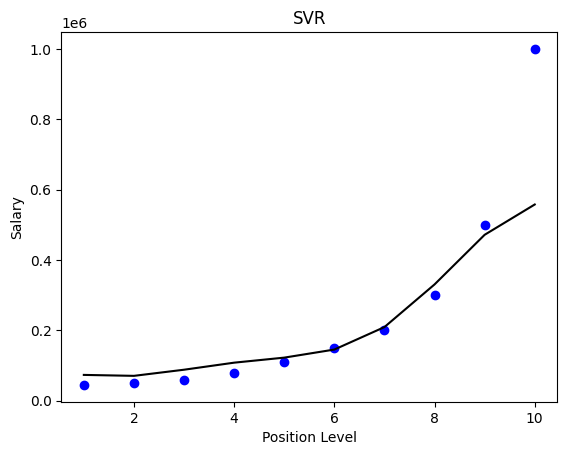

In [40]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'black')

plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')

<ipython-input-42-ecfb12342f2a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


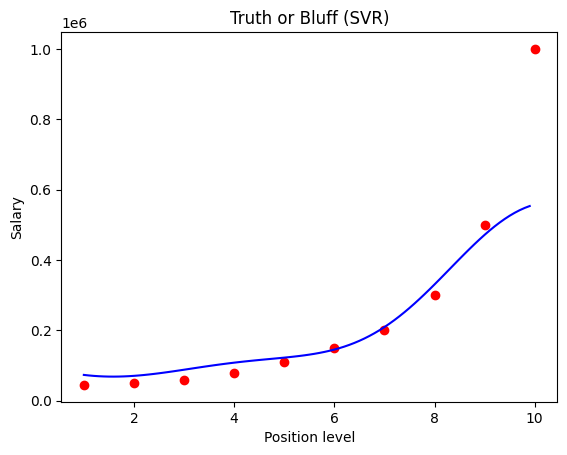

In [42]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()